In [541]:
import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve
from decimal import *
import locale

locale.setlocale(locale.LC_ALL, '')
getcontext().rounding = ROUND_DOWN
TWOPLACES = Decimal(10) ** -2

font = {'family' : 'AppleGothic',
        'weight' : 'regular',
        'size'   :  18}

plt.rc('font', **font)

# Standard

## All Diseases

In [535]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Y_ValSet120E2C.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_all, tpr_all, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_all = auc(fpr_all, tpr_all)
AUC_all = Decimal(auc_all).quantize(TWOPLACES)

## Pneumonia-Atelectasis

In [536]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Y_ValSet120E2C_Pneumonia-Atelectasis.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_pa, tpr_pa, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_pa = auc(fpr_pa, tpr_pa)
AUC_pa = Decimal(auc_pa).quantize(TWOPLACES)

## Mass

In [537]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Y_ValSet120E2C_Mass.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_m, tpr_m, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_m = auc(fpr_m, tpr_m)
AUC_m = Decimal(auc_m).quantize(TWOPLACES)

## Emphysema

In [538]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Y_ValSet120E2C_Emphysema.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_e, tpr_e, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_e = auc(fpr_e, tpr_e)
AUC_e = Decimal(auc_e).quantize(TWOPLACES)

## Nodules

In [539]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Y_ValSet120E2C_Nodules.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_n, tpr_n, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_n = auc(fpr_n, tpr_n)
AUC_n = Decimal(auc_n).quantize(TWOPLACES)

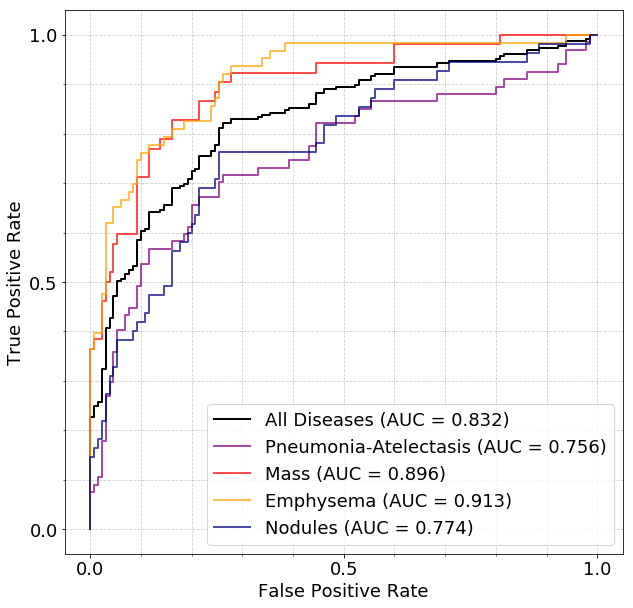

In [542]:
# Display
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1, 1, 1)

# Plot, Legend
plt.plot(fpr_all, tpr_all, lw=2, alpha=1.0, color="black",  label='All Diseases (AUC = %0.3f)'          % (auc_all))
plt.plot(fpr_pa,  tpr_pa,  lw=2, alpha=0.7, color="purple", label='Pneumonia-Atelectasis (AUC = %0.3f)' % (auc_pa))
plt.plot(fpr_m,   tpr_m,   lw=2, alpha=0.7, color="red",    label='Mass (AUC = %0.3f)'                  % (auc_m))
plt.plot(fpr_e,   tpr_e,   lw=2, alpha=0.7, color="orange", label='Emphysema (AUC = %0.3f)'             % (auc_e))
plt.plot(fpr_n,   tpr_n,   lw=2, alpha=0.7, color="navy",   label='Nodules (AUC = %0.3f)'               % (auc_n))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 1.1, 0.5)
minor_ticks = np.arange(0, 1.1, 0.1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.grid()
plt.show()

# Baseline

## All Diseases

In [525]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/X_ValSetCLR120E2C.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_all, tpr_all, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_all = auc(fpr_all, tpr_all)
AUC_all = Decimal(auc_all).quantize(TWOPLACES)

## Pneumonia-Atelectasis

In [526]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/X_ValSetCLR120E2C_Pneumonia-Atelectasis.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_pa, tpr_pa, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_pa = auc(fpr_pa, tpr_pa)
AUC_pa = Decimal(auc_pa).quantize(TWOPLACES)

## Mass

In [527]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/X_ValSetCLR120E2C_Mass.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_m, tpr_m, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_m = auc(fpr_m, tpr_m)
AUC_m = Decimal(auc_m).quantize(TWOPLACES)

## Emphysema

In [529]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/X_ValSetCLR120E2C_Emphysema.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_e, tpr_e, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_e = auc(fpr_e, tpr_e)
AUC_e = Decimal(auc_e).quantize(TWOPLACES)

## Nodules

In [530]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/X_ValSetCLR120E2C_Nodules.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_n, tpr_n, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_n = auc(fpr_n, tpr_n)
AUC_n = Decimal(auc_n).quantize(TWOPLACES)

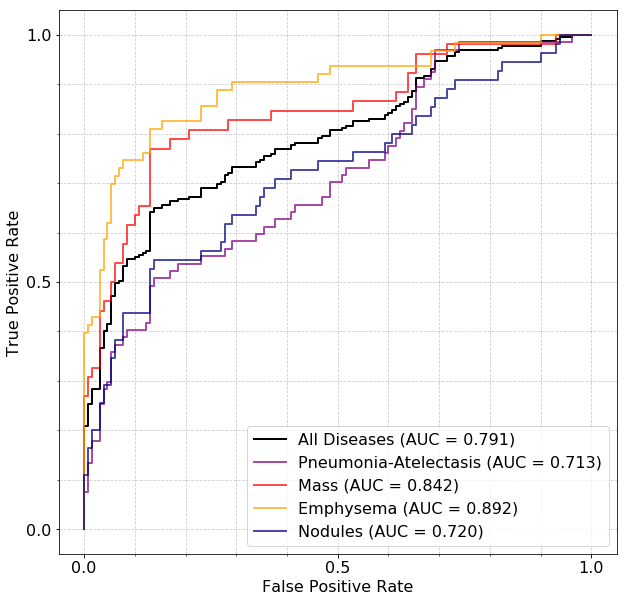

In [534]:
# Display
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1, 1, 1)

# Plot, Legend
plt.plot(fpr_all, tpr_all, lw=2, alpha=1.0, color="black",  label='All Diseases (AUC = %0.3f)'          % (auc_all))
plt.plot(fpr_pa,  tpr_pa,  lw=2, alpha=0.7, color="purple", label='Pneumonia-Atelectasis (AUC = %0.3f)' % (auc_pa))
plt.plot(fpr_m,   tpr_m,   lw=2, alpha=0.7, color="red",    label='Mass (AUC = %0.3f)'                  % (auc_m))
plt.plot(fpr_e,   tpr_e,   lw=2, alpha=0.7, color="orange", label='Emphysema (AUC = %0.3f)'             % (auc_e))
plt.plot(fpr_n,   tpr_n,   lw=2, alpha=0.7, color="navy",   label='Nodules (AUC = %0.3f)'               % (auc_n))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 1.1, 0.5)
minor_ticks = np.arange(0, 1.1, 0.1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.grid()
plt.show()

# Experimental

## All Diseases

In [570]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Z_ValSet120E2C.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_all, tpr_all, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_all = auc(fpr_all, tpr_all)
AUC_all = Decimal(auc_all).quantize(TWOPLACES)

## Pneumonia-Atelectasis

In [571]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Z_ValSet120E2C_Pneumonia-Atelectasis.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_pa, tpr_pa, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_pa = auc(fpr_pa, tpr_pa)
AUC_pa = Decimal(auc_pa).quantize(TWOPLACES)

## Mass

In [572]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Z_ValSet120E2C_Mass.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_m, tpr_m, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_m = auc(fpr_m, tpr_m)
AUC_m = Decimal(auc_m).quantize(TWOPLACES)

## Emphysema

In [573]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Z_ValSet120E2C_Emphysema.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_e, tpr_e, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_e = auc(fpr_e, tpr_e)
AUC_e = Decimal(auc_e).quantize(TWOPLACES)

## Nodules

In [574]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Z_ValSet120E2C_Nodules.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_n, tpr_n, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_n = auc(fpr_n, tpr_n)
AUC_n = Decimal(auc_n).quantize(TWOPLACES)

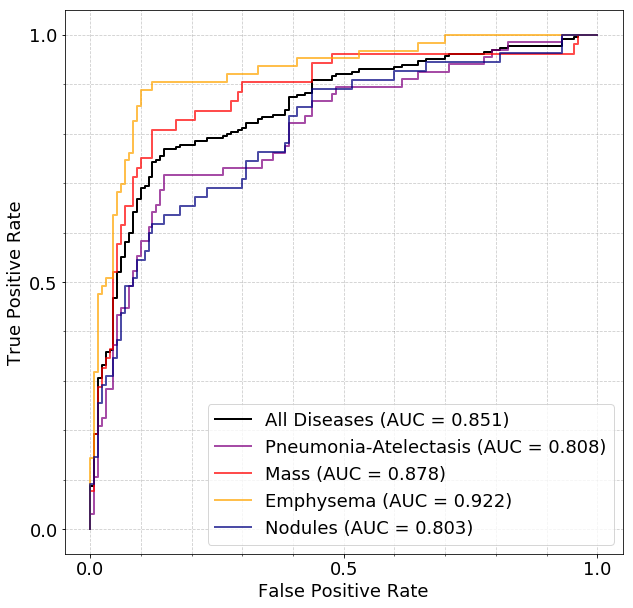

In [575]:
# Display
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1, 1, 1)

# Plot, Legend
plt.plot(fpr_all, tpr_all, lw=2, alpha=1.0, color="black",  label='All Diseases (AUC = %0.3f)'          % (auc_all))
plt.plot(fpr_pa,  tpr_pa,  lw=2, alpha=0.7, color="purple", label='Pneumonia-Atelectasis (AUC = %0.3f)' % (auc_pa))
plt.plot(fpr_m,   tpr_m,   lw=2, alpha=0.7, color="red",    label='Mass (AUC = %0.3f)'                  % (auc_m))
plt.plot(fpr_e,   tpr_e,   lw=2, alpha=0.7, color="orange", label='Emphysema (AUC = %0.3f)'             % (auc_e))
plt.plot(fpr_n,   tpr_n,   lw=2, alpha=0.7, color="navy",   label='Nodules (AUC = %0.3f)'               % (auc_n))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 1.1, 0.5)
minor_ticks = np.arange(0, 1.1, 0.1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.grid()
plt.show()

# One-Off Tests

In [601]:
# Loading CSV
Fold1         =  pd.read_csv("./val_sheets/Final/Z2_ValSet110EC.csv")
Fold1_matrix  =  Fold1.values
pred_f1       =  Fold1_matrix[:,1]
y_true_f1     =  Fold1['y_true']

# FPR, TPR Scores
fpr_n, tpr_n, _  =  roc_curve(y_true=y_true_f1, y_score=pred_f1, pos_label=1)

# Constructing AUC
auc_n = auc(fpr_n, tpr_n)
AUC_n = Decimal(auc_n).quantize(TWOPLACES)

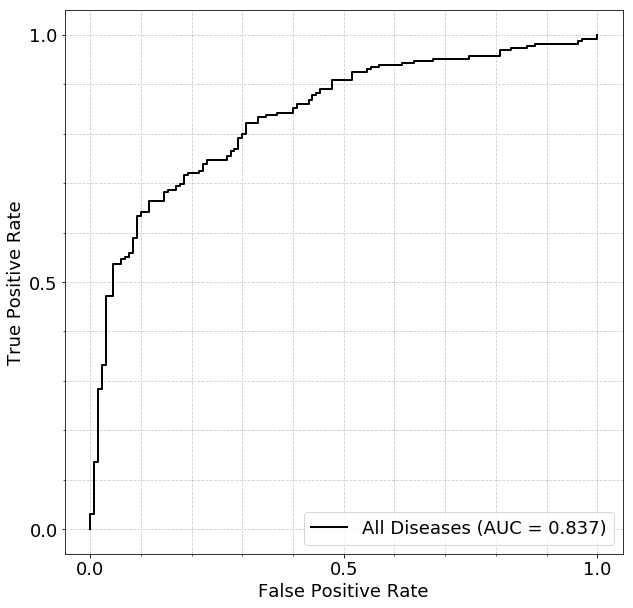

In [602]:
# Display
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1, 1, 1)

# Plot, Legend
plt.plot(fpr_n, tpr_n, lw=2, alpha=1.0, color="black",  label='All Diseases (AUC = %0.3f)'          % (auc_n))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 1.1, 0.5)
minor_ticks = np.arange(0, 1.1, 0.1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.grid()
plt.show()

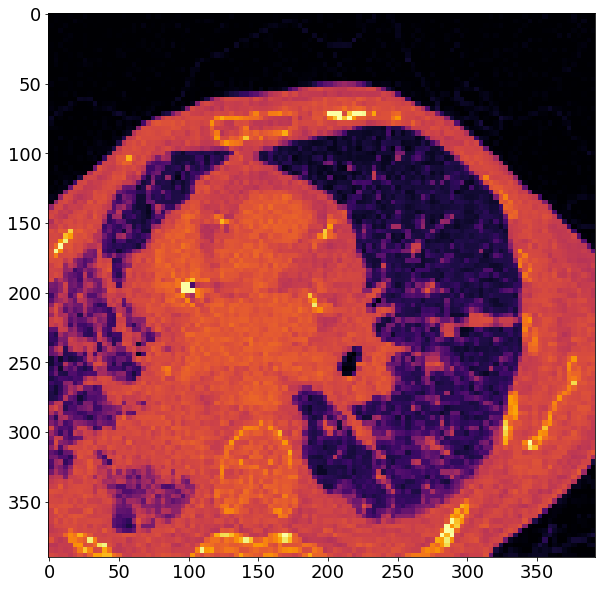

In [593]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('01.png')     
gray = rgb2gray(img)    
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='inferno')
plt.show()

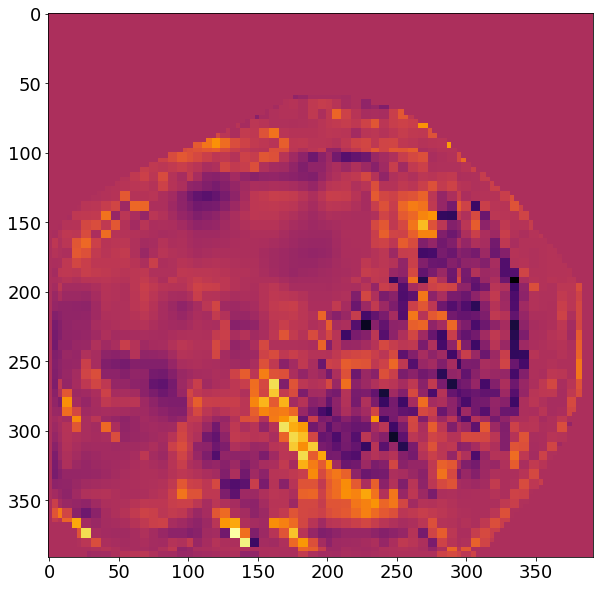

In [594]:
img = mpimg.imread('01x.png')     
gray = rgb2gray(img)    
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='inferno')
plt.show()